In [1]:
x = var('x')
mu = var('mu')

In [2]:
# tent map
def f(x, mu) :
  if ( x < 0.5 ) :  
    return mu * x
  else :
    return mu * (1-x)

In [3]:
def cobweb(mu, xvals) :
  plt  = plot( x, x, 0, 1 , color="black", aspect_ratio='1')
  plt += line(((0,1),(1,1),(1,0)), color="lightgray")
  plt += plot( lambda x:f(x, mu), x, 0, 1, color="green", thickness=3 )

  color   = 0
  Ncolors = len(xvals)
  for x0 in xvals :
    x1 = f(x0, mu)    
    cob_line = [(x0,0), (x0,x1)]
    for i in range(10) :
       x2 = f(x1, mu)
       cob_line += [(x0,x1), (x1,x1), (x1,x2)]
       x0 = x1
       x1 = x2        

    plt += line(cob_line, color=hue(.8-float(color)/(1.8*Ncolors)))
    color += 1

  xi = (pi/10).n()
  for dummy in range(1000) :
    xi = f(xi, mu)
    
  attractor = [(xi,1)] 
  for dummy in range(1000) :
    xi = f(xi, mu)
    attractor.append((xi,1))
    
  plt += point(attractor, color="blue")

  return show( plt )

In [4]:
@interact
def _( mu = slider(0, 2, step_size=0.01) ):

    show( cobweb( mu, (0.2, 0.5)) )

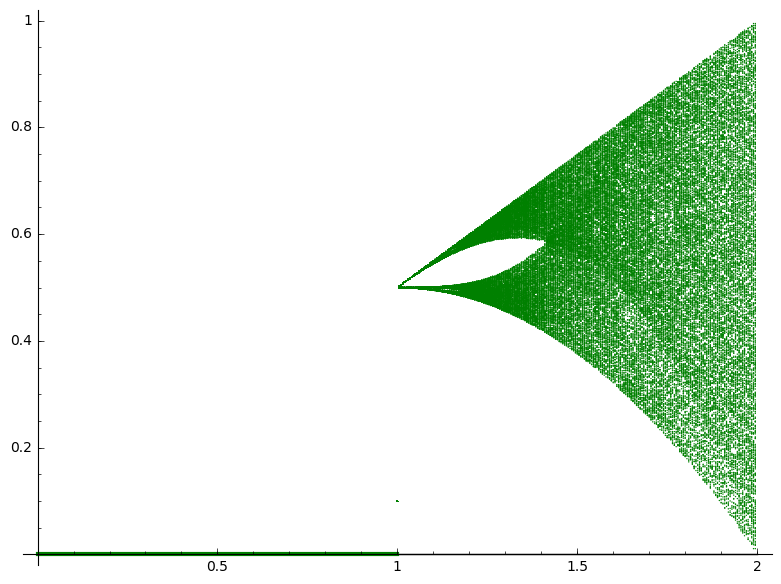

In [5]:
xMin = 0
xMax = 2

pBif = plot( 0, x, xMin, xMax, ymin=0, ymax=1, color="black")

if xMin < 1 :
  pBif += plot( 0, x, xMin, 1, color="green", thickness=3 )

resolution = 200
for inc in range(resolution) :
  mu = 1 + inc/resolution
  xi = 0.1
  for dummy in range(1000) :
    xi = f(xi, mu)
    
  attractor = [(mu,xi)] 
  for dummy in range(500) :
    xi = f(xi, mu)
    attractor.append((mu, xi))
    
  pBif += point(attractor, color="green", size=1)


show( pBif )